In [88]:
import numpy as np
import os
import PIL
import tensorflow as tf
import imghdr
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle 
from sklearn.model_selection import KFold
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input



In [89]:
class_names = ['Dogs', 'Cats']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

def load_data():
    
    datasets = ['C:/Users/simon/Desktop/CatsDogsSeparate/train', 'C:/Users/simon/Desktop/CatsDogsSeparate/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

(train_images, train_labels),(test_images, test_labels) = load_data()
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0 
test_images = test_images / 255.0


  0%|          | 0/11053 [00:00<?, ?it/s]

Loading C:/Users/simon/Desktop/CatsDogsSeparate/train


  1%|          | 9/1385 [00:00<00:15, 89.63it/s]

Loading C:/Users/simon/Desktop/CatsDogsSeparate/test


100%|██████████| 1410/1410 [00:06<00:00, 201.78it/s]


Number of training examples: 22075
Number of testing examples: 2795
Each image is of size: (64, 64)


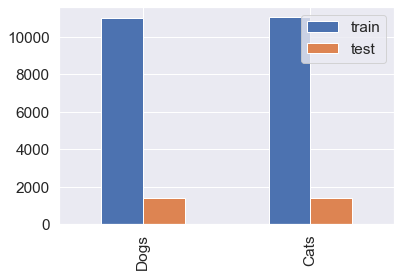

In [31]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

In [33]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

display_examples(class_names, train_images, train_labels)

LeNet-5

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation = 'tanh', input_shape = (64, 64, 3)), 
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(32, (5, 5), activation = 'tanh'),
    tf.keras.layers.AveragePooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
])

In [39]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
138/138 [==============================] - 130s 693ms/step - loss: 0.8220 - accuracy: 0.5200 - val_loss: 0.6793 - val_accuracy: 0.5839
Epoch 2/20
138/138 [==============================] - 88s 637ms/step - loss: 0.6731 - accuracy: 0.5858 - val_loss: 0.6438 - val_accuracy: 0.6267
Epoch 3/20
138/138 [==============================] - 85s 615ms/step - loss: 0.6468 - accuracy: 0.6219 - val_loss: 0.6354 - val_accuracy: 0.6245
Epoch 4/20
138/138 [==============================] - 83s 603ms/step - loss: 0.6326 - accuracy: 0.6383 - val_loss: 0.6178 - val_accuracy: 0.6655
Epoch 5/20
138/138 [==============================] - 85s 619ms/step - loss: 0.6201 - accuracy: 0.6550 - val_loss: 0.6131 - val_accuracy: 0.6650
Epoch 6/20
138/138 [==============================] - 80s 577ms/step - loss: 0.6041 - accuracy: 0.6689 - val_loss: 0.6049 - val_accuracy: 0.6695
Epoch 7/20
138/138 [==============================] - 81s 589ms/step - loss: 0.5908 - accuracy: 0.6838 - val_loss: 0.5968 - val_a

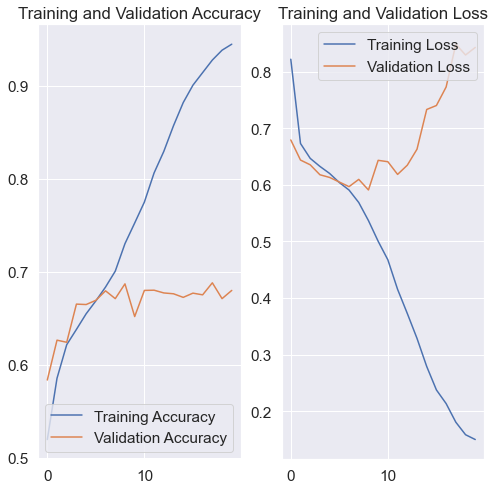

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
test_loss = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss[0]} / Test accuracy: {test_loss[1]}')

88/88 [==============================] - 7s 48ms/step - loss: 0.7813 - accuracy: 0.6844
Test loss: 0.781338632106781 / Test accuracy: 0.6844365000724792


In [43]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

88/88 [==============================] - 8s 49ms/step


In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

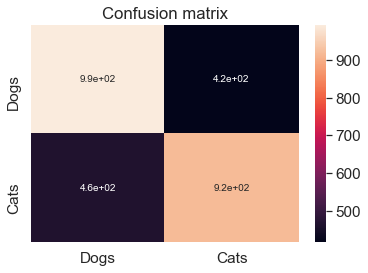

In [44]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [45]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.6883352398872375


In [68]:
class_names = ['Dogs', 'Cats']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

def load_images():
    
    dts = ['C:/Users/simon/Desktop/CatsDogsSeparateCV/train',
    'C:/Users/simon/Desktop/CatsDogsSeparateCV/test']
    result = []
    
    for dt in dts:
        
        imgs,labels = [], []
        
        print("Loading {}".format(dt))
        
        for folder in os.listdir(dt):
            label = class_names_label[folder]
            
            for file in tqdm(os.listdir(os.path.join(dt, folder))):
                
                img_path = os.path.join(os.path.join(dt, folder), file)
                
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, IMAGE_SIZE) 
                
                imgs.append(img)
                labels.append(label)
                
        imgs, labels = np.array(imgs, dtype = 'float32'), np.array(labels, dtype = 'int32')
        
        result.append((img, labels))

    return result

(train_images, train_labels), (test_images, test_labels) = load_images()

  0%|          | 6/2631 [00:00<00:45, 57.09it/s]

Loading C:/Users/simon/Desktop/CatsDogsSeparateCV/train


  3%|▎         | 15/540 [00:00<00:03, 146.57it/s]

Loading C:/Users/simon/Desktop/CatsDogsSeparateCV/test


100%|██████████| 996/996 [00:09<00:00, 100.61it/s]


In [81]:
folds = 5

accuracy_per_fold = []
loss_per_fold = []

inputs = np.concatenate((train_images, test_images), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)

kfold = KFold(n_splits=folds, shuffle=True)

fold_no = 1


for train, test in kfold.split(train_images, train_labels):
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation = 'tanh', input_shape = (64, 64, 3)), 
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(32, (5, 5), activation = 'tanh'),
    tf.keras.layers.AveragePooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=50,
              epochs=25,
              verbose=1)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1
  


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
354/354 [==============================] - 133s 339ms/step - loss: 0.9192 - accuracy: 0.4990
Epoch 2/25
354/354 [==============================] - 120s 339ms/step - loss: 0.7002 - accuracy: 0.5021
Epoch 3/25
354/354 [==============================] - 123s 348ms/step - loss: 0.6943 - accuracy: 0.4967
Epoch 4/25
354/354 [==============================] - 110s 310ms/step - loss: 0.6943 - accuracy: 0.4971
Epoch 5/25
354/354 [==============================] - 102s 289ms/step - loss: 0.6945 - accuracy: 0.4921
Epoch 6/25
354/354 [==============================] - 103s 290ms/step - loss: 0.6950 - accuracy: 0.4936
Epoch 7/25
354/354 [==============================] - 104s 293ms/step - loss: 0.6963 - accuracy: 0.4995
Epoch 8/25
354/354 [==============================] - 94s 264ms/step - loss: 0.6954 - accuracy: 0.5019
Epoch 9/25
354/354 [==============================] - 88s 247ms/step - l

Score for fold 1: loss of 0.6931590437889099; accuracy of 50.05662441253662%
Score for fold 2: loss of 0.6932060122489929; accuracy of 49.875423312187195%
Score for fold 3: loss of 0.6934722065925598; accuracy of 49.49037432670593%
Score for fold 4: loss of 0.6937083601951599; accuracy of 49.17327165603638%
Score for fold 5: loss of 0.6931993365287781; accuracy of 48.946771025657654%

AlexNet 

In [47]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])

In [48]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
138/138 [==============================] - 180s 1s/step - loss: 0.7600 - accuracy: 0.5824 - val_loss: 0.7516 - val_accuracy: 0.5037
Epoch 2/20
138/138 [==============================] - 172s 1s/step - loss: 0.6066 - accuracy: 0.6763 - val_loss: 0.7868 - val_accuracy: 0.5105
Epoch 3/20
138/138 [==============================] - 177s 1s/step - loss: 0.5519 - accuracy: 0.7253 - val_loss: 0.8450 - val_accuracy: 0.5087
Epoch 4/20
138/138 [==============================] - 165s 1s/step - loss: 0.5112 - accuracy: 0.7529 - val_loss: 1.0142 - val_accuracy: 0.5176
Epoch 5/20
138/138 [==============================] - 164s 1s/step - loss: 0.4707 - accuracy: 0.7783 - val_loss: 0.6664 - val_accuracy: 0.6342
Epoch 6/20
138/138 [==============================] - 164s 1s/step - loss: 0.4256 - accuracy: 0.8029 - val_loss: 0.5402 - val_accuracy: 0.7234
Epoch 7/20
138/138 [==============================] - 174s 1s/step - loss: 0.3816 - accuracy: 0.8322 - val_loss: 0.9145 - val_accuracy: 0.5391

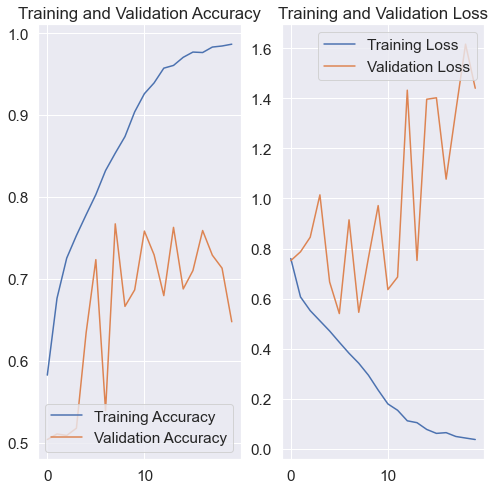

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
test_loss = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss[0]} / Test accuracy: {test_loss[1]}')

88/88 [==============================] - 7s 49ms/step - loss: 1.4749 - accuracy: 0.6490
Test loss: 1.474876880645752 / Test accuracy: 0.6490160822868347


In [51]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

88/88 [==============================] - 13s 114ms/step


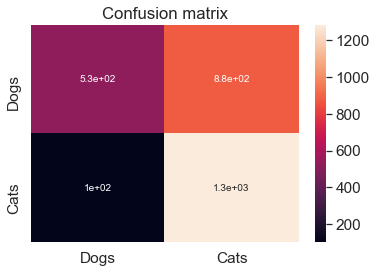

In [52]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [53]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.7671574354171753


In [87]:
fold_no = 1

for train, test in kfold.split(train_images, train_labels):
  model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=50,
              epochs=25,
              verbose=1)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
354/354 [==============================] - 211s 555ms/step - loss: 0.7398 - accuracy: 0.5883
Epoch 2/25
354/354 [==============================] - 183s 515ms/step - loss: 0.6022 - accuracy: 0.6786
Epoch 3/25
354/354 [==============================] - 191s 539ms/step - loss: 0.5509 - accuracy: 0.7242
Epoch 4/25
354/354 [==============================] - 180s 510ms/step - loss: 0.5068 - accuracy: 0.7587
Epoch 5/25
354/354 [==============================] - 173s 487ms/step - loss: 0.4718 - accuracy: 0.7805
Epoch 6/25
354/354 [==============================] - 18361s 52s/step - loss: 0.4346 - accuracy: 0.7972
Epoch 7/25
354/354 [==============================] - 189s 533ms/step - loss: 0.3812 - accuracy: 0.8279
Epoch 8/25
354/354 [==============================] - 183s 518ms/step - loss: 0.3415 - accuracy: 0.8522
Epoch 9/25
354/354 [==============================] - 2401s 7s/step - l

Score for fold 1: loss of 1.425240397453308; accuracy of 76.46659016609192%
Score for fold 2: loss of 1.613309383392334; accuracy of 78.12004685401917%
Score for fold 3: loss of 1.2840262651443481; accuracy of 76.73839330673218%
Score for fold 4: loss of 1.1653919219970703; accuracy of 76.80634260177612%
Score for fold 5: loss of 1.7895742654800415; accuracy of 77.62174606323242%

ResNet-50

In [60]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights=None))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.layers[0].trainable = False

In [61]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
138/138 [==============================] - 211s 1s/step - loss: 0.8224 - accuracy: 0.6067 - val_loss: 0.7126 - val_accuracy: 0.5071
Epoch 2/20
138/138 [==============================] - 192s 1s/step - loss: 0.6328 - accuracy: 0.6463 - val_loss: 0.6932 - val_accuracy: 0.5094
Epoch 3/20
138/138 [==============================] - 195s 1s/step - loss: 0.6060 - accuracy: 0.6715 - val_loss: 0.7039 - val_accuracy: 0.5196
Epoch 4/20
138/138 [==============================] - 188s 1s/step - loss: 0.6004 - accuracy: 0.6769 - val_loss: 0.6509 - val_accuracy: 0.6145
Epoch 5/20
138/138 [==============================] - 191s 1s/step - loss: 0.5858 - accuracy: 0.6904 - val_loss: 0.6454 - val_accuracy: 0.6557
Epoch 6/20
138/138 [==============================] - 194s 1s/step - loss: 0.5836 - accuracy: 0.6963 - val_loss: 0.6184 - val_accuracy: 0.6602
Epoch 7/20
138/138 [==============================] - 184s 1s/step - loss: 0.5737 - accuracy: 0.6978 - val_loss: 0.7162 - val_accuracy: 0.6249

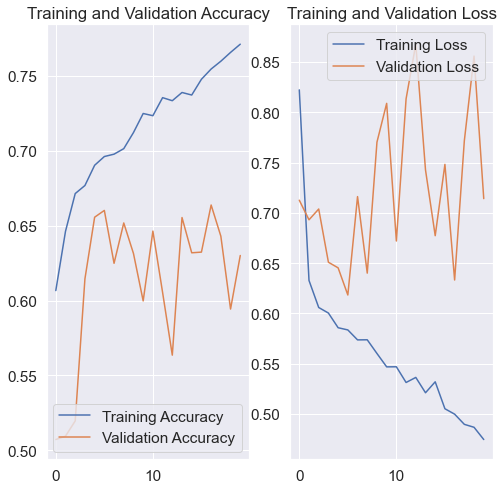

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [63]:
test_loss = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss[0]} / Test accuracy: {test_loss[1]}')

88/88 [==============================] - 32s 329ms/step - loss: 0.7006 - accuracy: 0.6501
Test loss: 0.7006387710571289 / Test accuracy: 0.65008944272995


In [64]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

88/88 [==============================] - 32s 312ms/step


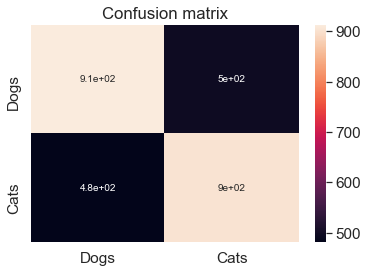

In [65]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [66]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.6638731360435486


In [90]:
fold_no = 1

for train, test in kfold.split(train_images, train_labels):
  model = Sequential()
  model.add(ResNet50(include_top=False, pooling='avg', weights=None))
  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(2048, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(1024, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(2, activation='softmax'))
  model.layers[0].trainable = False

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=50,
              epochs=25,
              verbose=1)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
354/354 [==============================] - 193s 506ms/step - loss: 0.7263 - accuracy: 0.6035
Epoch 2/25
354/354 [==============================] - 182s 514ms/step - loss: 0.6383 - accuracy: 0.6452
Epoch 3/25
354/354 [==============================] - 181s 511ms/step - loss: 0.6194 - accuracy: 0.6642
Epoch 4/25
354/354 [==============================] - 179s 505ms/step - loss: 0.6076 - accuracy: 0.6793
Epoch 5/25
354/354 [==============================] - 177s 500ms/step - loss: 0.5865 - accuracy: 0.6928
Epoch 6/25
354/354 [==============================] - 177s 499ms/step - loss: 0.5738 - accuracy: 0.7054
Epoch 7/25
354/354 [==============================] - 178s 504ms/step - loss: 0.5720 - accuracy: 0.7037
Epoch 8/25
354/354 [==============================] - 178s 503ms/step - loss: 0.5514 - accuracy: 0.7207
Epoch 9/25
354/354 [==============================] - 178s 503ms/step -

[0.9783876538276672, 0.6475651264190674]